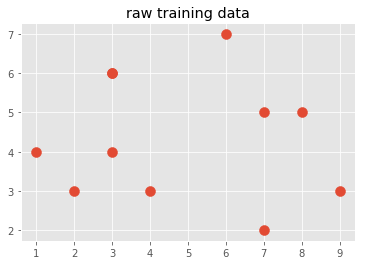

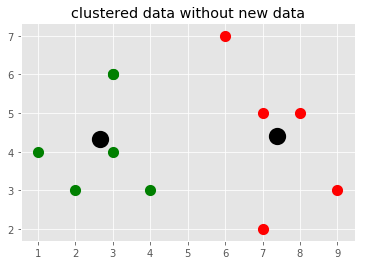

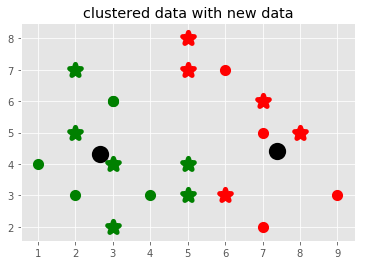

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('ggplot')


X = np.array([[1,4],[2,3],[3,6],[7,5],[8,5],[7,2],[6,7],[3,6],[9,3],[4,3],[3,4]])

plt.title("raw training data")
plt.scatter(X[:,0],X[:,1],s=100) #linewidths=15)
plt.show()

colors = 20*["g","r","c","b","k"]

class K_Means:
    def __init__(self,k=2,tol=0.001,max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        
    def fit(self,data):
        self.centroids = {}
        
        for i in range(self.k):
            self.centroids[i] = data[i]
        for i in range(self.max_iter):
            self.classifications = {}
            
            for i in range(self.k):
                self.classifications[i] = []
                
            for features in data:
                distances = [np.linalg.norm(features-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(features)
                
            prev_centroids = dict(self.centroids)
            
            for classification in self.classifications:
                #pass
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
            optimized =True
            
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                
                if np.sum((current_centroid - original_centroid)/original_centroid*100.0)>self.tol:
                    optimized = False
            
            if optimized:
                break
        
    def predict(self,data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
    
clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0],clf.centroids[centroid][1],marker='o',color="k",s=150,linewidth=5)

for classification in clf.classifications:
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0],featureset[1],marker=".", color=colors[classification], s=150, linewidths=5)
        
plt.title("clustered data without new data")
plt.show()

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0],clf.centroids[centroid][1],marker='o',color="k",s=150,linewidth=5)

for classification in clf.classifications:
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0],featureset[1],marker=".", color=colors[classification], s=150, linewidths=5)
        
new_dataset = np.array([[2,5],[3,2],[5,7],[8,5],[5,8],[2,7],[7,6],[6,3],[3,4],[5,3],[5,4]])

for newdset in new_dataset:
    classification = clf.predict(newdset)
    plt.scatter(newdset[0], newdset[1], marker="*", color = colors[classification], s=150, linewidths=5)

plt.title("clustered data with new data")
plt.show()
        